<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/CSGOaggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Интерпретируемость модели. Интерпретируемость — это способность модели, которое показывает, что структуру данной модели может объяснить человек.


# CS

[CSGO Pro Players Dataset](https://www.kaggle.com/datasets/sadmadlad/csgo-pro-players-dataset?select=hltv_playerStats-complete.csv)


As a personal fan of CSGO's competitive circuit, I decided to extract out data of 803 pro players from HLTV as an exercise for web scraping.

File Information
The whole data is compiled in a single file named as hltv_playerStats-complete.csv.
The dataset has been extracted on 2nd May, 2022.

Columns
`nick`: The in-game name of the pro player.

`country`: Country of the pro player.

`stats_link`: Link to the statistics page of the player on hltv.org

`teams`: Current and previous teams of the player.

`maps_played`: Total maps played by the player.

`round_played`: Total rounds played by the player.

`kd_difference`: Kill-Death difference.

`kd_ratio`: Kill-Death ratio of the player. KD = kills / deaths

`rating`: Average rating of the player.

`total_kills`: Total kills of the player in competitive play.

`headshot_percentage`: Headshot percentage of the player.

`total_deaths`: Total deaths of the player in competitive play.

`grenade_damage_per_round`: Average utility damage (using Molotov, HE grenade etc.) done by the player per round.

`kills_per_round`: Kills per round of the player.

`assists_per_round`: Assists per round of the player. Assist only counts when the player does 41 damage or more to the opponent and the other player kills the opponent.

`teammate_saved_per_round`: Average number of teammates saved per round by the player.

`saved_by_teammate_per_round`: Average number of times the player was saved by his/her teammate.

`kast`: According to HLTV: "Percentage of rounds in which the player either had a Kill, Assist, Survived or was Traded."

`impact`: Average impact of the player in games. The parameter is calculated based on number of factors like multi-kills, 1vX clutches won, damage done, economic decisions, flash assists and many other factors.

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from ast import literal_eval
import folium
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge

In [ ]:
cs = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/hltv_playerStats-complete.csv')
cs.head(2)

,nick,country,stats_link,teams,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",970,25491,5917,1.38,1.27,21602,41.3,15685,3.6,0.85,0.13,0.62,0.10,0.12,74.9,1.45
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],1532,40464,8864,1.34,1.25,34647,41.3,25783,2.4,0.86,0.10,0.64,0.08,0.11,74.2,1.36


In [ ]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nick                         803 non-null    object 
 1   country                      803 non-null    object 
 2   stats_link                   803 non-null    object 
 3   teams                        803 non-null    object 
 4   maps_played                  803 non-null    int64  
 5   rounds_played                803 non-null    int64  
 6   kd_difference                803 non-null    int64  
 7   kd_ratio                     803 non-null    float64
 8   rating                       803 non-null    float64
 9   total_kills                  803 non-null    int64  
 10  headshot_percentage          803 non-null    float64
 11  total_deaths                 803 non-null    int64  
 12  grenade_damage_per_round     803 non-null    float64
 13  kills_per_round     

In [ ]:
cs.describe()

,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
count,803.000000,803.000000,803.000000,803.000000,803.00000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,833.174346,21893.596513,585.465753,1.035430,1.01188,15142.087173,45.462017,14556.518057,4.061395,0.688904,0.131046,0.666949,0.096015,0.096862,70.112827,1.054944
std,402.388811,10607.751477,1475.806605,0.092114,0.06656,7539.729631,8.416641,7018.031710,1.187467,0.044705,0.017702,0.030042,0.011236,0.013084,1.790944,0.100154
min,374.000000,9498.000000,-6238.000000,0.740000,0.77000,5530.000000,23.600000,5994.000000,1.400000,0.520000,0.080000,0.530000,0.040000,0.060000,63.300000,0.700000
25%,500.500000,13227.000000,-283.000000,0.980000,0.97000,9092.500000,40.500000,8842.500000,3.200000,0.660000,0.120000,0.650000,0.090000,0.090000,69.000000,0.990000
50%,734.000000,19174.000000,358.000000,1.030000,1.01000,13132.000000,47.300000,12603.000000,3.900000,0.690000,0.130000,0.670000,0.100000,0.100000,70.100000,1.060000
75%,1059.000000,27881.000000,1313.500000,1.090000,1.05000,19214.000000,51.450000,18226.500000,4.800000,0.720000,0.140000,0.690000,0.100000,0.110000,71.400000,1.120000
max,2169.000000,56914.000000,8864.000000,1.450000,1.27000,40884.000000,68.400000,38351.000000,9.100000,0.860000,0.180000,0.750000,0.140000,0.160000,76.300000,1.450000


In [ ]:
cs[cs['nick']=='ZywOo']

,nick,country,stats_link,teams,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",970,25491,5917,1.38,1.27,21602,41.3,15685,3.6,0.85,0.13,0.62,0.1,0.12,74.9,1.45


## Separating Numeric and Text Data

In [ ]:
df_numeric = cs.select_dtypes(include=[np.number])
df_categoric = cs.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

In [ ]:
def maxAndMinStats(dataframe, cols):
    """Extracting out players with interesting statistics"""
    def maxAndMin(dataf, column):
        return dataf.loc[dataf[column].idxmax()], dataf.loc[dataf[column].idxmin()]
    
    maxMinList = []
    
    for col in cols:
        print('Column: ', col)
        res = maxAndMin(dataframe, col)
        max_, min_ = res
        print('Max in ', col, ': ', max_['nick'])
        print('Min in ', col, ': ', min_['nick'], '\n')
        
        maxMinList.append(res)
    
    return maxMinList

In [ ]:
maxMinStats = maxAndMinStats(cs, df_numeric_cols)

Column:  maps_played
Max in  maps_played :  bubble
Min in  maps_played :  DANK1NG 

Column:  rounds_played
Max in  rounds_played :  bubble
Min in  rounds_played :  FrostMisty 

Column:  kd_difference
Max in  kd_difference :  s1mple
Min in  kd_difference :  HUNDEN 

Column:  kd_ratio
Max in  kd_ratio :  sh1ro
Min in  kd_ratio :  RuFire 

Column:  rating
Max in  rating :  ZywOo
Min in  rating :  OCEAN 

Column:  total_kills
Max in  total_kills :  f0rest
Min in  total_kills :  OCEAN 

Column:  headshot_percentage
Max in  headshot_percentage :  b1t
Min in  headshot_percentage :  jdm64 

Column:  total_deaths
Max in  total_deaths :  TaZ
Min in  total_deaths :  deko 

Column:  grenade_damage_per_round
Max in  grenade_damage_per_round :  flusha
Min in  grenade_damage_per_round :  smike 

Column:  kills_per_round
Max in  kills_per_round :  s1mple
Min in  kills_per_round :  OCEAN 

Column:  assists_per_round
Max in  assists_per_round :  Texta
Min in  assists_per_round :  SENSEi 

Column:  death

s1mple has most kills per round. He is considered to be The Best Player in CSGO.
f0rest has most kills. He is regarded as the greatest player of Counter-Strike (1.6 and Global Offensive) as a whole. He is still performing in Tier 1 tournaments. He is a living proof that age might just be a number.
flusha has the most grenade damage per round. He is known for his 'interesting' plays and brilliant mind for CSGO in general.
sh1ro has lowest deaths per round which makes sense considering his role as an awper, reserved nature of his playstyle and slow play of his team.
bubble has most maps and rounds played. The 30 years old is still playing in SKADE with his Bulgarian colleagues in SKADE as of now.
b1t has the highest headshot percentage. He is the new headshot machine in the making if he keeps this statistic up for just some more time.
ZywOo has most impact and rating. He was and is still considered to be a contender for greatest player of CSGO in coming years if he manages to perform better.
TaZ has most deaths but do not let this figure distract you from the fact that he was part of the legendary Virtus.Pro lineup with pashaBiceps, Snax, Neo and byali. His deaths may indicate his sacrificial role in the team.

## Recent / Current Team

In [ ]:
def extractTopTeam(teams):
    return literal_eval(teams)[0]

cs['recent_team'] = np.vectorize(extractTopTeam)(cs['teams'])

In [ ]:
df_numeric = cs.select_dtypes(include=[np.number])
df_categoric = cs.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

In [ ]:
df_categoric.head(5)

,nick,country,stats_link,teams,recent_team
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",Vitality
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],Natus Vincere
2,sh1ro,Russia,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",Gambit Youngsters
3,deko,Russia,https://www.hltv.org//stats/players/20113/deko,['1WIN'],1WIN
4,Kaze,Malaysia,https://www.hltv.org//stats/players/8950/kaze,"['ViCi', 'Flash', 'MVP.karnal']",ViCi


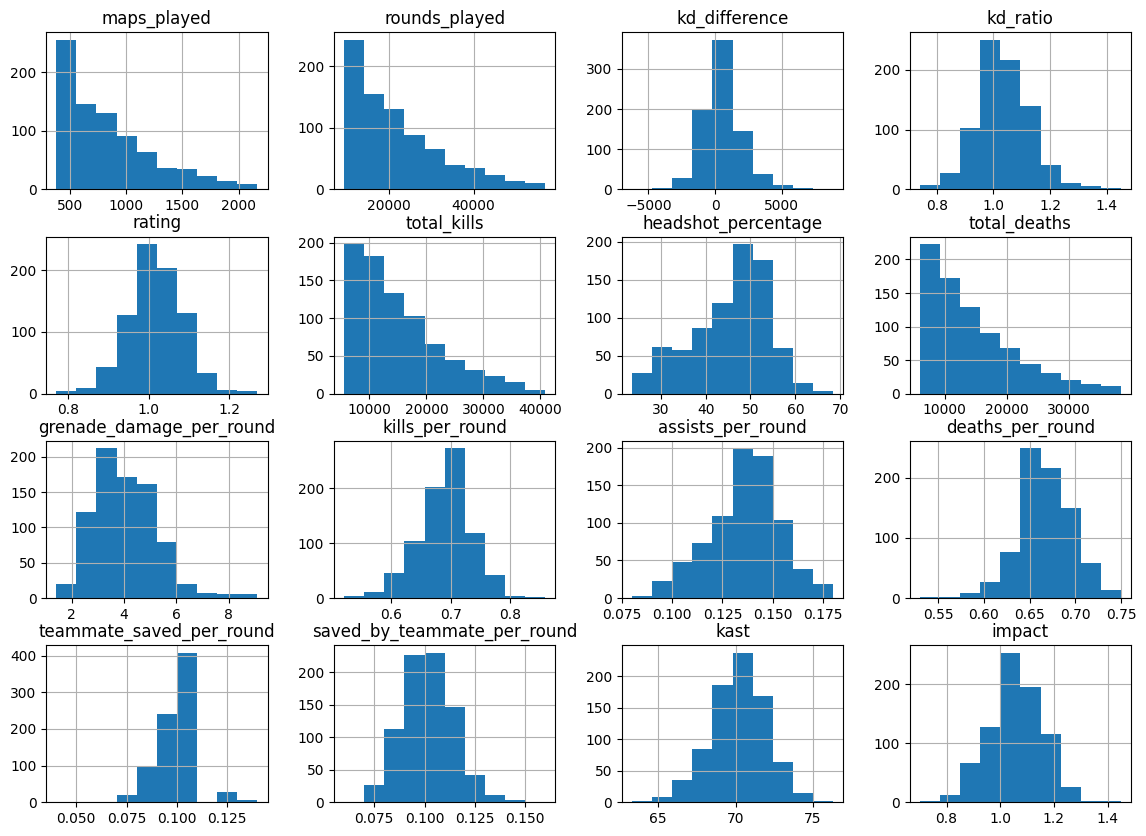

In [ ]:
df_numeric.hist(figsize=(14, 10));


## Analysis By Countries

In [ ]:
df_countrycounts = pd.DataFrame(cs['country'].value_counts())
df_countrycounts['countries'] = df_countrycounts.index
df_countrycounts = df_countrycounts.reset_index(drop=True)
df_countrycounts.columns = ['counts', 'country']

df_countrycounts.head(3)

,counts,country
0,83,United States
1,72,Denmark
2,64,Russia


In [ ]:
df_countrycounts.replace('United States', "United States of America", inplace = True)

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

m = folium.Map()
folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth COVID-19',
    data=df_countrycounts,
    columns=['country', 'counts'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)
m

In [ ]:
to_remove_countries = list(df_countrycounts.loc[df_countrycounts['counts'] < 5]['country'])
df_c = cs[~cs['country'].isin(to_remove_countries)]
df_c_means = df_c.groupby('country').agg('mean')
df_c_means = df_c_means.reset_index()

df_c_means.head(3)

<ipython-input-15-bd7437c3ba00>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_c_means = df_c.groupby('country').agg('mean')


,country,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,Argentina,538.000000,13962.250000,187.500000,1.026250,1.010000,9602.750000,46.200000,9415.250000,4.075000,0.688750,0.131250,0.675000,0.100000,0.102500,70.100000,1.068750
1,Australia,656.347826,16899.260870,643.891304,1.049348,1.024348,11841.369565,44.706522,11197.391304,4.413043,0.697174,0.135652,0.666739,0.096522,0.097174,70.330435,1.080000
2,Belarus,714.666667,18926.222222,60.888889,0.990000,0.976667,12823.000000,48.188889,12761.777778,3.300000,0.668889,0.126667,0.676667,0.092222,0.093333,69.300000,1.006667


In [ ]:
to_plot_countries = list(df_countrycounts.head(11)['country'])
df_to_plot_countries = df_c_means[df_c_means['country'].isin(to_plot_countries)]
df_to_plot_countries[:2]

,country,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
1,Australia,656.347826,16899.260870,643.891304,1.049348,1.024348,11841.369565,44.706522,11197.391304,4.413043,0.697174,0.135652,0.666739,0.096522,0.097174,70.330435,1.080000
4,Brazil,770.118644,20068.847458,888.915254,1.066949,1.031356,13972.677966,44.006780,13083.762712,4.242373,0.695763,0.132712,0.653390,0.094407,0.096102,71.108475,1.073051


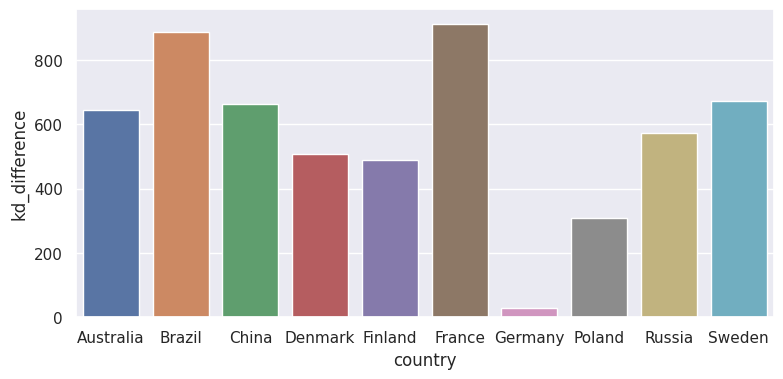

In [ ]:

sns.set(rc={'figure.figsize':(9, 4)})
sns.barplot(x='country', y='kd_difference', data=df_to_plot_countries);

Some of the interesting facts from these countries are as belows:

French and German players have played the most maps on average, with Sweden being third in this category.
German players have very slightly lower figures when it comes to ratings and impacts.
Note: While the statistics do show the average ratings, impacts etc. for the players, they are not the most accurate representation of strength of the players country-wise. The competition in Europe is a lot more tougher as compared to Asia and Australia. The European Country with most mediocre stats (Germany in this case) is still competitively ahead against the likes of China and Australia.

## Player Nicks

In [ ]:
sumNicks = cs['nick'].sum()
onlyAlphas = ''.join(c for c in sumNicks if c.isalpha())
onlyNums = ''.join(c for c in sumNicks if c.isnumeric())

alphasDict = dict(Counter(onlyAlphas))
numsDict = dict(Counter(onlyNums))

maxAlpha = max(alphasDict, key=alphasDict.get)
maxNum = max(numsDict, key=numsDict.get)

print("Most common alphabet in Player's nick: ", maxAlpha)
print("Most common number in Player's nick: ", maxNum)

Most common alphabet in Player's nick:  e
Most common number in Player's nick:  1


In [ ]:
numsDict

{'1': 36, '3': 16, '0': 15, '4': 7, '2': 3, '7': 5, '6': 3, '9': 4}


## Correlation Matrix

In [ ]:
rearrangement_cols = ['maps_played','rounds_played','kd_difference','kd_ratio','total_kills','headshot_percentage','total_deaths',
 'grenade_damage_per_round','kills_per_round','assists_per_round','deaths_per_round','teammate_saved_per_round','saved_by_teammate_per_round',
 'kast','impact', 'rating']
df_numeric = df_numeric[rearrangement_cols]

<Axes: >

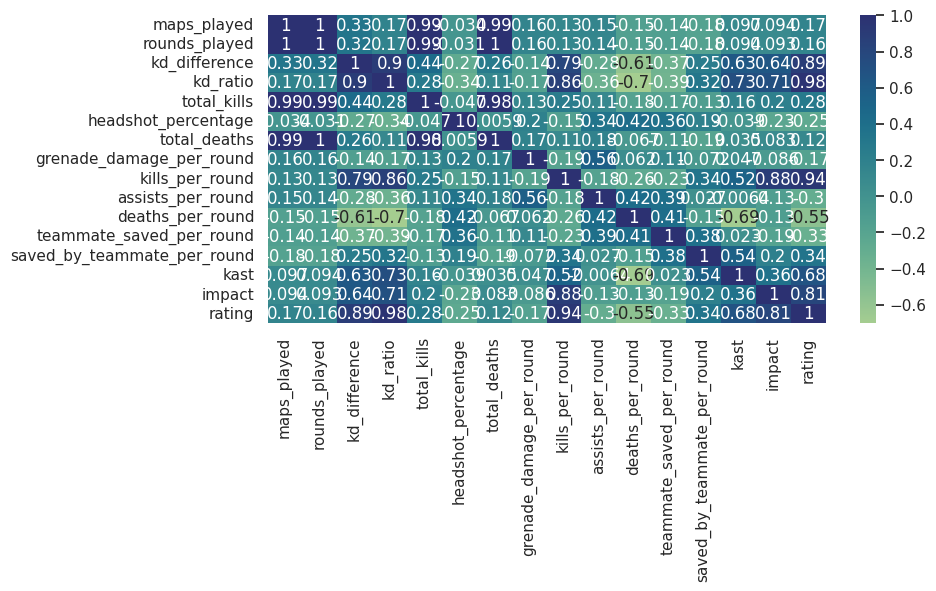

In [ ]:
sns.heatmap(df_numeric.corr(), annot=True, cmap="crest")

In [ ]:
df_numeric.corr()

,maps_played,rounds_played,kd_difference,kd_ratio,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact,rating
maps_played,1.000000,0.999567,0.325856,0.173095,0.989785,-0.033506,0.994834,0.158904,0.131522,0.146806,-0.153757,-0.139781,-0.177439,0.097354,0.093872,0.166645
rounds_played,0.999567,1.000000,0.323874,0.170897,0.989933,-0.030931,0.995409,0.160973,0.129112,0.140079,-0.153011,-0.142665,-0.178530,0.094361,0.092576,0.164533
kd_difference,0.325856,0.323874,1.000000,0.897978,0.439113,-0.270310,0.261441,-0.142059,0.790508,-0.282991,-0.606655,-0.371295,0.250831,0.630055,0.640250,0.885133
kd_ratio,0.173095,0.170897,0.897978,1.000000,0.277020,-0.336886,0.108764,-0.170131,0.860466,-0.356994,-0.703399,-0.390850,0.317186,0.729081,0.711817,0.975770
total_kills,0.989785,0.989933,0.439113,0.277020,1.000000,-0.047403,0.981986,0.130232,0.253777,0.111807,-0.180751,-0.170832,-0.130529,0.156189,0.202846,0.281089
headshot_percentage,-0.033506,-0.030931,-0.270310,-0.336886,-0.047403,1.000000,0.005910,0.199724,-0.153186,0.338815,0.416622,0.358388,0.192331,-0.039458,-0.227175,-0.254322
total_deaths,0.994834,0.995409,0.261441,0.108764,0.981986,0.005910,1.000000,0.169794,0.106387,0.179634,-0.066616,-0.105438,-0.192972,0.035300,0.083263,0.115833
grenade_damage_per_round,0.158904,0.160973,-0.142059,-0.170131,0.130232,0.199724,0.169794,1.000000,-0.188115,0.555941,0.061775,0.114898,-0.072252,0.047477,-0.086020,-0.174096
kills_per_round,0.131522,0.129112,0.790508,0.860466,0.253777,-0.153186,0.106387,-0.188115,1.000000,-0.181790,-0.256598,-0.232861,0.344997,0.520580,0.882170,0.941016
assists_per_round,0.146806,0.140079,-0.282991,-0.356994,0.111807,0.338815,0.179634,0.555941,-0.181790,1.000000,0.423817,0.388970,0.026573,-0.006441,-0.132044,-0.301788


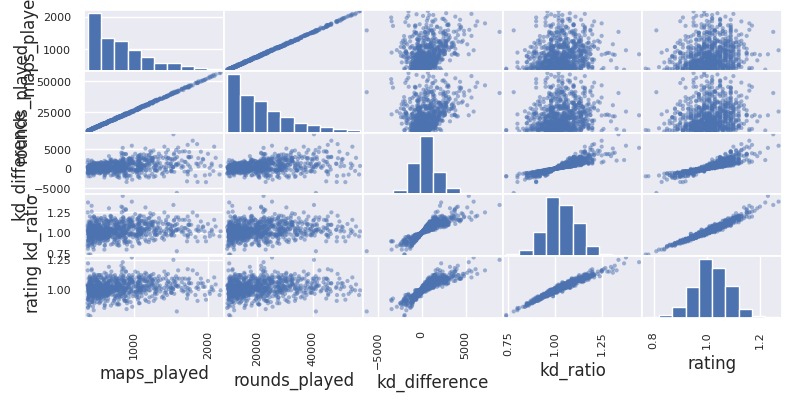

In [ ]:
numeric_cols = list(df_numeric.columns)
target_col = numeric_cols.pop()

cols_to_plot = numeric_cols[:4] + [target_col]
scatter_matrix(cs[cols_to_plot]);

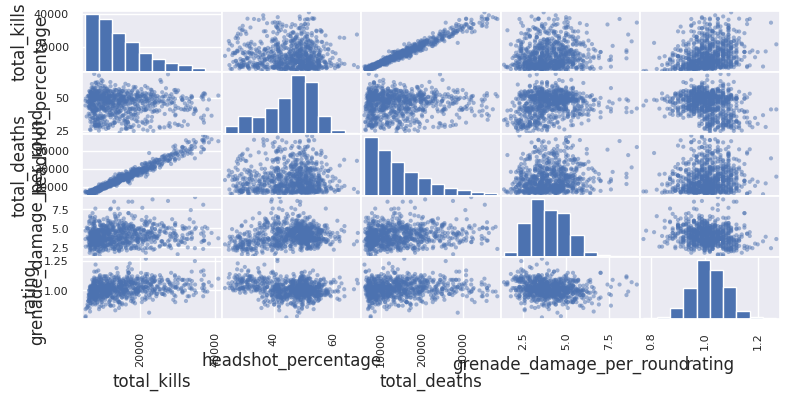

In [ ]:
cols_to_plot = numeric_cols[4:8] + [target_col]
scatter_matrix(cs[cols_to_plot]);

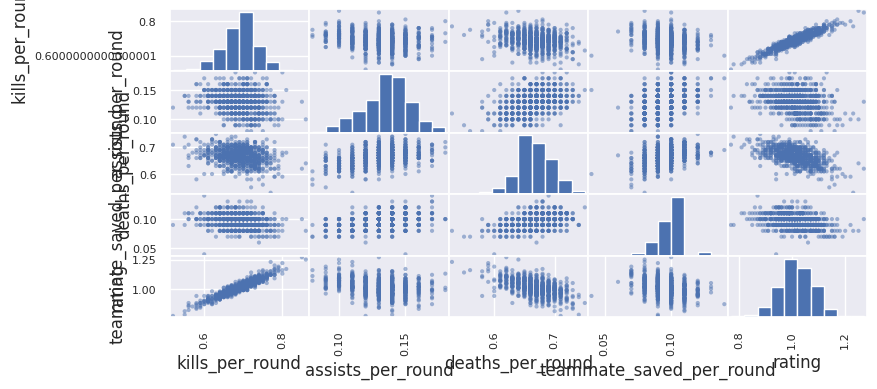

In [ ]:
cols_to_plot = numeric_cols[8:12] + [target_col]
scatter_matrix(cs[cols_to_plot]);

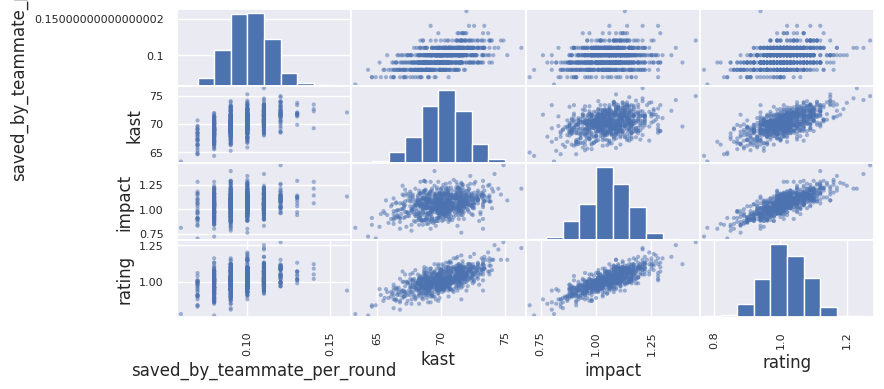

In [ ]:

cols_to_plot = numeric_cols[12:] + [target_col]
scatter_matrix(cs[cols_to_plot]);


## Regression 

In [ ]:
cols_to_drop = ['maps_played', 'rounds_played', 'total_kills', 'total_deaths', 'saved_by_teammate_per_round']
df_train = df_numeric.drop(columns = cols_to_drop)

X, y = df_train.drop(columns = ['rating']), df_train['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
lassoPipe = Pipeline([
    ('stdscaler', StandardScaler()),
    ('lasso', Ridge(alpha=0.1))
])

lassoPipe.fit(X_train, y_train)

Pipeline(steps=[('stdscaler', StandardScaler()), ('lasso', Ridge(alpha=0.1))])

In [ ]:
predictions_on_train = lassoPipe.predict(X_train)
squared_error_train = ((predictions_on_train - y_train)**2).sum()
print('Squared Error on Train: ', squared_error_train)

Squared Error on Train:  0.018461439902885936


In [ ]:
predictions_on_test = lassoPipe.predict(X_test)
squared_error_test = ((predictions_on_test - y_test)**2).sum()
print('Squared Error on Test:', squared_error_test)

Squared Error on Test: 0.004533969408444884


https://chrissardegna.com/blog/problems-with-csgo-rating-systems/

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
cs.columns

Index(['nick', 'country', 'stats_link', 'teams', 'maps_played',
       'rounds_played', 'kd_difference', 'kd_ratio', 'rating', 'total_kills',
       'headshot_percentage', 'total_deaths', 'grenade_damage_per_round',
       'kills_per_round', 'assists_per_round', 'deaths_per_round',
       'teammate_saved_per_round', 'saved_by_teammate_per_round', 'kast',
       'impact', 'recent_team'],
      dtype='object')

In [ ]:
lin_res = ols("rating ~ kills_per_round + assists_per_round + deaths_per_round+teammate_saved_per_round+saved_by_teammate_per_round+grenade_damage_per_round+headshot_percentage",data=cs).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:57:28   Log-Likelihood:                 2932.7
No. Observations:                 803   AIC:                            -5849.
Df Residuals:                     795   BIC:                            -5812.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### KD

In [ ]:
lin_res = ols("rating ~ kd_difference",data=cs).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2898.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.43e-268
Time:                        08:57:28   Log-Likelihood:                 1651.2
No. Observations:                 803   AIC:                            -3298.
Df Residuals:                     801   BIC:                            -3289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9885      0.001    840.060

In [ ]:
lin_res = ols("rating ~ total_kills+total_deaths",data=cs).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1578.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.23e-278
Time:                        08:57:28   Log-Likelihood:                 1678.7
No. Observations:                 803   AIC:                            -3351.
Df Residuals:                     800   BIC:                            -3337.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0048      0.002    411.491   

### KDR = kills / deaths

In [ ]:
lin_res = ols("rating ~ kd_ratio",data=cs).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.593e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:57:28   Log-Likelihood:                 2257.2
No. Observations:                 803   AIC:                            -4510.
Df Residuals:                     801   BIC:                            -4501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2818      0.006     48.532      0.0

### KDA = (kills + assists)/ deaths

In [ ]:
cs['KDA'] = (cs['kills_per_round']+cs['assists_per_round'])/cs['deaths_per_round']

In [ ]:
lin_res = ols("rating ~ KDA",data=cs).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     6208.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:57:28   Log-Likelihood:                 1907.8
No. Observations:                 803   AIC:                            -3812.
Df Residuals:                     801   BIC:                            -3802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1746      0.011     16.390      0.0

In [ ]:
lin_res = ols("rating ~ kd_ratio+KDA",data=cs).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     7965.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:57:28   Log-Likelihood:                 2257.6
No. Observations:                 803   AIC:                            -4509.
Df Residuals:                     800   BIC:                            -4495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2772      0.008     36.704      0.0

In [ ]:
cs.columns

Index(['nick', 'country', 'stats_link', 'teams', 'maps_played',
       'rounds_played', 'kd_difference', 'kd_ratio', 'rating', 'total_kills',
       'headshot_percentage', 'total_deaths', 'grenade_damage_per_round',
       'kills_per_round', 'assists_per_round', 'deaths_per_round',
       'teammate_saved_per_round', 'saved_by_teammate_per_round', 'kast',
       'impact', 'recent_team', 'KDA'],
      dtype='object')

### impact

In [ ]:
lin_res = ols("rating ~ impact",data=cs).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1492.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          4.11e-185
Time:                        08:57:29   Log-Likelihood:                 1459.2
No. Observations:                 803   AIC:                            -2914.
Df Residuals:                     801   BIC:                            -2905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4464      0.015     30.349      0.0

## Group

In [ ]:
raits = cs.groupby(['rating']).agg('mean').round(2)
raits.sort_index(ascending=False).head()

<ipython-input-42-0518674462e0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raits = cs.groupby(['rating']).agg('mean').round(2)


,maps_played,rounds_played,kd_difference,kd_ratio,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact,KDA
rating,,,,,,,,,,,,,,,,
1.27,970.0,25491.0,5917.0,1.38,21602.0,41.3,15685.0,3.6,0.85,0.13,0.62,0.10,0.12,74.9,1.45,1.58
1.25,1532.0,40464.0,8864.0,1.34,34647.0,41.3,25783.0,2.4,0.86,0.10,0.64,0.08,0.11,74.2,1.36,1.50
1.23,847.0,22465.0,5361.0,1.45,17320.0,27.9,11959.0,3.9,0.77,0.11,0.53,0.08,0.11,76.3,1.21,1.66
1.22,378.0,10219.0,2225.0,1.37,8219.0,36.9,5994.0,3.3,0.80,0.10,0.59,0.09,0.11,74.5,1.21,1.53
1.20,829.0,21617.0,4118.0,1.32,16957.0,30.3,12839.0,2.9,0.78,0.11,0.59,0.08,0.10,73.7,1.24,1.51


In [ ]:
cs.columns

Index(['nick', 'country', 'stats_link', 'teams', 'maps_played',
       'rounds_played', 'kd_difference', 'kd_ratio', 'rating', 'total_kills',
       'headshot_percentage', 'total_deaths', 'grenade_damage_per_round',
       'kills_per_round', 'assists_per_round', 'deaths_per_round',
       'teammate_saved_per_round', 'saved_by_teammate_per_round', 'kast',
       'impact', 'recent_team', 'KDA'],
      dtype='object')

In [ ]:
country = cs.groupby(['country']).agg('mean').round(2)
country.sort_values(by=['rating'],ascending=False)

<ipython-input-44-e1fc4664d246>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country = cs.groupby(['country']).agg('mean').round(2)


,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact,KDA
country,,,,,,,,,,,,,,,,,
Malaysia,829.00,21617.00,4118.00,1.32,1.20,16957.00,30.30,12839.00,2.90,0.78,0.11,0.59,0.08,0.10,73.70,1.24,1.51
Bosnia and Herzegovina,1514.50,40118.50,4782.50,1.17,1.14,31573.50,49.95,26791.00,4.90,0.79,0.14,0.67,0.09,0.11,71.55,1.27,1.38
Hong Kong,742.00,18909.00,2151.00,1.18,1.12,14338.00,49.30,12187.00,2.90,0.76,0.13,0.64,0.09,0.11,72.90,1.15,1.39
New Zealand,744.57,19085.71,1790.43,1.14,1.08,13904.14,37.39,12113.71,4.46,0.73,0.13,0.64,0.10,0.10,71.56,1.15,1.35
Israel,535.50,14279.50,1083.00,1.12,1.08,10368.50,43.85,9285.50,2.90,0.73,0.10,0.65,0.09,0.09,70.20,1.15,1.28
Uruguay,470.50,12436.50,963.50,1.13,1.07,8923.50,47.75,7960.00,3.80,0.72,0.13,0.64,0.10,0.11,72.75,1.08,1.34
Indonesia,625.50,16120.00,1523.75,1.12,1.07,11948.00,38.30,10424.25,3.20,0.74,0.13,0.66,0.10,0.11,72.35,1.12,1.33
Guatemala,525.00,13434.00,369.00,1.04,1.06,10096.00,62.90,9727.00,4.80,0.75,0.12,0.72,0.11,0.11,68.80,1.20,1.21
Jordan,870.00,22834.00,1402.00,1.09,1.05,16229.00,55.50,14827.00,3.60,0.71,0.12,0.65,0.10,0.11,72.10,1.06,1.28


In [ ]:
cs.columns

Index(['nick', 'country', 'stats_link', 'teams', 'maps_played',
       'rounds_played', 'kd_difference', 'kd_ratio', 'rating', 'total_kills',
       'headshot_percentage', 'total_deaths', 'grenade_damage_per_round',
       'kills_per_round', 'assists_per_round', 'deaths_per_round',
       'teammate_saved_per_round', 'saved_by_teammate_per_round', 'kast',
       'impact', 'recent_team', 'KDA'],
      dtype='object')

In [ ]:
agg_func_math = {
    'kd_ratio': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'nunique', 'count', 'mad', 'prod']
}
country_kd = cs.groupby(['country']).agg(agg_func_math).round(2)
country_kd.sort_values(by=[('kd_ratio','mean')],ascending=False)

<ipython-input-46-ecbb3c307710>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  country_kd = cs.groupby(['country']).agg(agg_func_math).round(2)
<ipython-input-46-ecbb3c307710>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  country_kd = cs.groupby(['country']).agg(agg_func_math).round(2)
<ipython-input-46-ecbb3c307710>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  country_kd = cs.groupby(['country']).agg(agg_func_math).round(2)
<ipython-input-46-ecbb3c307710>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  country_kd = cs.group

kd_ratio                                               \
                            sum  mean median   min   max   std   var nunique   
country                                                                        
Malaysia                   1.32  1.32   1.32  1.32  1.32   NaN   NaN       1   
Hong Kong                  1.18  1.18   1.18  1.18  1.18   NaN   NaN       1   
Bosnia and Herzegovina     2.35  1.17   1.17  1.16  1.19  0.02  0.00       2   
New Zealand                7.99  1.14   1.12  0.96  1.31  0.12  0.02       7   
Uruguay                    2.26  1.13   1.13  1.06  1.20  0.10  0.01       2   
Israel                     2.25  1.12   1.12  1.11  1.14  0.02  0.00       2   
Indonesia                  4.47  1.12   1.11  1.02  1.23  0.09  0.01       4   
Mexico                     1.09  1.09   1.09  1.09  1.09   NaN   NaN       1   
Jordan                     1.09  1.09   1.09  1.09  1.09   NaN   NaN       1   
Singapore                  4.31  1.08   1.08  0.95  1.20  0.12  0.01       4   
Turkey                     8.66  1.08   1.08  0.96  1.20  0.10  0.01       7   
Latvia                     5.34  1.07   1.07  1.00  1.14  0.06  0.00       5   
Korea                      4.29  1.07   1.06  0.98  1.20  0.10  0.01       4   
Netherlands                3.20  1.07   1.05  1.04  1.11  0.04  0.00       3   
Slovakia                   7.46  1.07   1.04  0.98  1.19  0.08  0.01       5   
Estonia                    6.42  1.07   1.04  1.01  1.21  0.08  0.01       6   
Brazil                    62.95  1.07   1.06  0.92  1.28  0.08  0.01      28   
North Macedonia            1.06  1.06   1.06  1.06  1.06   NaN   NaN       1   
Mongolia                   6.34  1.06   1.06  0.93  1.17  0.08  0.01       6   
Czech Republic             6.36  1.06   1.04  0.95  1.20  0.09  0.01       6   
Australia                 48.27  1.05   1.04  0.85  1.17  0.07  0.01      24   
Thailand                  11.54  1.05   1.03  0.98  1.18  0.07  0.00      10   
China                     29.38  1.05   1.06  0.88  1.25  0.08  0.01      16   
South Africa               5.20  1.04   1.01  0.96  1.14  0.09  0.01       4   
Russia                    66.44  1.04   1.02  0.74  1.45  0.13  0.02      34   
Lithuania                  5.18  1.04   1.01  0.95  1.13  0.07  0.00       4   
Montenegro                 1.04  1.04   1.04  1.04  1.04   NaN   NaN       1   
Guatemala                  1.04  1.04   1.04  1.04  1.04   NaN   NaN       1   
Sweden                    53.35  1.03   1.02  0.85  1.19  0.08  0.01      26   
United States             85.69  1.03   1.02  0.83  1.19  0.08  0.01      30   
Serbia                    10.27  1.03   1.05  0.90  1.15  0.09  0.01      10   
Argentina                  8.21  1.03   1.02  0.95  1.11  0.06  0.00       7   
Belgium                    5.17  1.03   1.04  0.96  1.13  0.07  0.01       4   
France                    26.80  1.03   1.01  0.88  1.38  0.11  0.01      16   
Denmark                   73.91  1.03   1.04  0.78  1.25  0.10  0.01      31   
Bulgaria                  23.80  1.03   1.02  0.91  1.21  0.09  0.01      20   
Spain                      9.20  1.02   1.02  0.92  1.13  0.07  0.00       9   
Portugal                   8.13  1.02   1.02  0.93  1.06  0.04  0.00       6   
Romania                    6.11  1.02   1.00  0.90  1.18  0.10  0.01       6   
Kazakhstan                16.31  1.02   1.00  0.91  1.11  0.06  0.00      12   
Hungary                    8.18  1.02   1.00  0.95  1.26  0.10  0.01       6   
Finland                   26.52  1.02   1.02  0.84  1.19  0.09  0.01      16   
United Kingdom             9.17  1.02   0.98  0.87  1.27  0.12  0.02       8   
Ukraine                   23.56  1.02   1.03  0.80  1.34  0.13  0.02      17   
Canada                    24.34  1.01   1.00  0.74  1.18  0.11  0.01      18   
Poland                    52.75  1.01   1.02  0.85  1.21  0.07  0.01      25   
Kosovo                     2.00  1.00   1.00  0.96  1.04  0.06  0.00       2   
Norway                 

In [ ]:
country_kd.columns

MultiIndex([('kd_ratio',     'sum'),
            ('kd_ratio',    'mean'),
            ('kd_ratio',  'median'),
            ('kd_ratio',     'min'),
            ('kd_ratio',     'max'),
            ('kd_ratio',     'std'),
            ('kd_ratio',     'var'),
            ('kd_ratio', 'nunique'),
            ('kd_ratio',   'count'),
            ('kd_ratio',     'mad'),
            ('kd_ratio',    'prod')],
           )

In [ ]:
agg_func_math = {
    'kd_ratio': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'nunique', 'count', 'mad', 'prod']
}
country_kd = cs.groupby(['country']).agg(agg_func_math).round(2)
country_kd.sort_values(by=[('kd_ratio',   'count')],ascending=False)

<ipython-input-48-df609bbfe05b>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  country_kd = cs.groupby(['country']).agg(agg_func_math).round(2)
<ipython-input-48-df609bbfe05b>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  country_kd = cs.groupby(['country']).agg(agg_func_math).round(2)
<ipython-input-48-df609bbfe05b>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  country_kd = cs.groupby(['country']).agg(agg_func_math).round(2)
<ipython-input-48-df609bbfe05b>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  country_kd = cs.group

kd_ratio                                               \
                            sum  mean median   min   max   std   var nunique   
country                                                                        
United States             85.69  1.03   1.02  0.83  1.19  0.08  0.01      30   
Denmark                   73.91  1.03   1.04  0.78  1.25  0.10  0.01      31   
Russia                    66.44  1.04   1.02  0.74  1.45  0.13  0.02      34   
Brazil                    62.95  1.07   1.06  0.92  1.28  0.08  0.01      28   
Poland                    52.75  1.01   1.02  0.85  1.21  0.07  0.01      25   
Sweden                    53.35  1.03   1.02  0.85  1.19  0.08  0.01      26   
Australia                 48.27  1.05   1.04  0.85  1.17  0.07  0.01      24   
China                     29.38  1.05   1.06  0.88  1.25  0.08  0.01      16   
Finland                   26.52  1.02   1.02  0.84  1.19  0.09  0.01      16   
France                    26.80  1.03   1.01  0.88  1.38  0.11  0.01      16   
Germany                   24.95  1.00   0.97  0.84  1.16  0.09  0.01      17   
Canada                    24.34  1.01   1.00  0.74  1.18  0.11  0.01      18   
Bulgaria                  23.80  1.03   1.02  0.91  1.21  0.09  0.01      20   
Ukraine                   23.56  1.02   1.03  0.80  1.34  0.13  0.02      17   
Kazakhstan                16.31  1.02   1.00  0.91  1.11  0.06  0.00      12   
Norway                    11.96  1.00   1.00  0.90  1.11  0.06  0.00      10   
Thailand                  11.54  1.05   1.03  0.98  1.18  0.07  0.00      10   
Serbia                    10.27  1.03   1.05  0.90  1.15  0.09  0.01      10   
Spain                      9.20  1.02   1.02  0.92  1.13  0.07  0.00       9   
United Kingdom             9.17  1.02   0.98  0.87  1.27  0.12  0.02       8   
Belarus                    8.91  0.99   0.95  0.91  1.12  0.07  0.00       8   
Turkey                     8.66  1.08   1.08  0.96  1.20  0.10  0.01       7   
Argentina                  8.21  1.03   1.02  0.95  1.11  0.06  0.00       7   
Portugal                   8.13  1.02   1.02  0.93  1.06  0.04  0.00       6   
Hungary                    8.18  1.02   1.00  0.95  1.26  0.10  0.01       6   
Slovakia                   7.46  1.07   1.04  0.98  1.19  0.08  0.01       5   
New Zealand                7.99  1.14   1.12  0.96  1.31  0.12  0.02       7   
Mongolia                   6.34  1.06   1.06  0.93  1.17  0.08  0.01       6   
Romania                    6.11  1.02   1.00  0.90  1.18  0.10  0.01       6   
Estonia                    6.42  1.07   1.04  1.01  1.21  0.08  0.01       6   
Czech Republic             6.36  1.06   1.04  0.95  1.20  0.09  0.01       6   
Latvia                     5.34  1.07   1.07  1.00  1.14  0.06  0.00       5   
Lithuania                  5.18  1.04   1.01  0.95  1.13  0.07  0.00       4   
Belgium                    5.17  1.03   1.04  0.96  1.13  0.07  0.01       4   
South Africa               5.20  1.04   1.01  0.96  1.14  0.09  0.01       4   
Singapore                  4.31  1.08   1.08  0.95  1.20  0.12  0.01       4   
Korea                      4.29  1.07   1.06  0.98  1.20  0.10  0.01       4   
Indonesia                  4.47  1.12   1.11  1.02  1.23  0.09  0.01       4   
Netherlands                3.20  1.07   1.05  1.04  1.11  0.04  0.00       3   
Kosovo                     2.00  1.00   1.00  0.96  1.04  0.06  0.00       2   
Israel                     2.25  1.12   1.12  1.11  1.14  0.02  0.00       2   
Uruguay                    2.26  1.13   1.13  1.06  1.20  0.10  0.01       2   
Bosnia and Herzegovina     2.35  1.17   1.17  1.16  1.19  0.02  0.00       2   
Switzerland                1.78  0.89   0.89  0.81  0.97  0.11  0.01       2   
Taiwan                     0.98  0.98   0.98  0.98  0.98   NaN   NaN       1   
Malaysia                   1.32  1.32   1.32  1.32  1.32   NaN   NaN       1   
North Macedonia            1.06  1.06   1.06  1.06  1.06   NaN   NaN       1   
Montenegro             

## Кластерный CS

In [ ]:
cs1 = cs.copy()

In [ ]:
df_kmeans=cs1.drop(['country','nick','stats_link', 'teams'], axis=1).copy()

In [ ]:
df_kmeans.columns

Index(['maps_played', 'rounds_played', 'kd_difference', 'kd_ratio', 'rating',
       'total_kills', 'headshot_percentage', 'total_deaths',
       'grenade_damage_per_round', 'kills_per_round', 'assists_per_round',
       'deaths_per_round', 'teammate_saved_per_round',
       'saved_by_teammate_per_round', 'kast', 'impact'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

In [ ]:
scaled_df_kmeans

array([[ 0.34024537,  0.33934105,  3.61487548, ...,  1.76956233,
         2.67465538,  3.94695609],
       [ 1.73777495,  1.75173575,  5.61299414, ...,  1.00478378,
         2.28355635,  3.04777721],
       [ 0.03438036,  0.05390017,  3.23789755, ...,  1.00478378,
         3.45685344,  1.54914574],
       ...,
       [ 1.85216349,  1.81672873, -4.6264317 , ..., -0.52477333,
        -1.85091913, -2.54711361],
       [-1.11696519, -1.10446534, -1.70349667, ..., -2.81910899,
        -3.80641429, -2.44720485],
       [-1.05231079, -1.06512997, -1.7272273 , ..., -1.28955188,
        -3.24770139, -3.34638373]])

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("rating"), "Cluster", clusters)
df_kmeans.head(3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,maps_played,rounds_played,kd_difference,kd_ratio,Cluster,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,970,25491,5917,1.38,0,1.27,21602,41.3,15685,3.6,0.85,0.13,0.62,0.10,0.12,74.9,1.45
1,1532,40464,8864,1.34,0,1.25,34647,41.3,25783,2.4,0.86,0.10,0.64,0.08,0.11,74.2,1.36
2,847,22465,5361,1.45,1,1.23,17320,27.9,11959,3.9,0.77,0.11,0.53,0.08,0.11,76.3,1.21


In [ ]:
kmeans_model.cluster_centers_

array([[1.36675983e+03, 3.59842052e+04, 1.32110917e+03, 1.05960699e+00,
        1.02895197e+00, 2.51211223e+04, 4.54266376e+01, 2.37997336e+04,
        4.26375546e+00, 6.98384279e-01, 1.33886463e-01, 6.60480349e-01,
        9.36681223e-02, 9.42794760e-02, 7.04122271e+01, 1.07069869e+00],
       [6.20297909e+02, 1.62720819e+04, 2.91977352e+02, 1.02578397e+00,
        1.00506969e+00, 1.11609042e+04, 4.54761324e+01, 1.08688937e+04,
        3.98066202e+00, 6.85121951e-01, 1.29912892e-01, 6.69529617e-01,
        9.69512195e-02, 9.78919861e-02, 6.99933798e+01, 1.04865854e+00]])

<Axes: xlabel='total_kills', ylabel='total_deaths'>

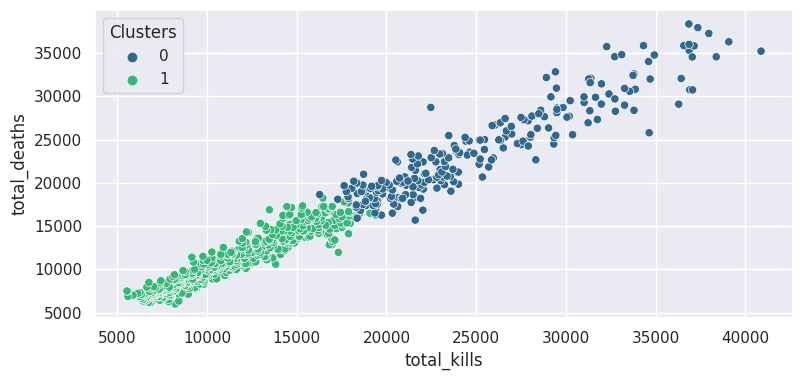

In [ ]:
df_kmeans['Clusters'] = kmeans_model.labels_
sns.scatterplot(x="total_kills", y="total_deaths",hue = 'Clusters',  data=df_kmeans, palette='viridis')

In [ ]:
df_kmeans2=cs1[['kills_per_round', 'deaths_per_round']].copy()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='kills_per_round', ylabel='deaths_per_round'>

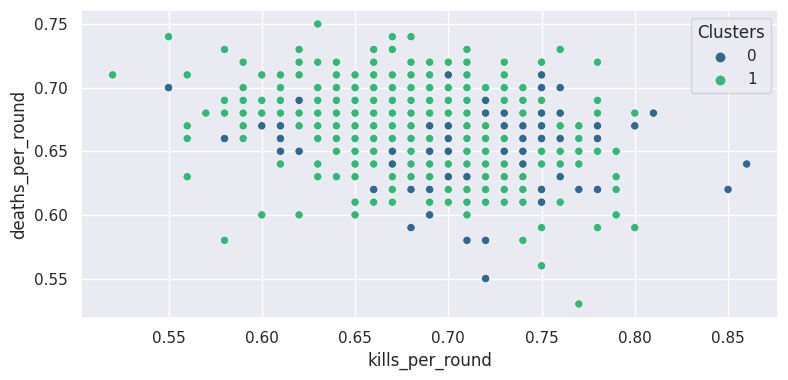

In [ ]:
scaled_df_kmeans = scaler.fit_transform(df_kmeans2)

clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans2.insert(df_kmeans2.columns.get_loc("kills_per_round"), "Cluster", clusters)

df_kmeans2['Clusters'] = kmeans_model.labels_
sns.scatterplot(x="kills_per_round", y="deaths_per_round",hue = 'Clusters',  data=df_kmeans2, palette='viridis')

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [ ]:
X=df_kmeans[['maps_played', 'rounds_played', 'kd_difference', 'kd_ratio', 
        'total_kills', 'headshot_percentage', 'total_deaths',
       'grenade_damage_per_round', 'kills_per_round', 'assists_per_round',
       'deaths_per_round', 'teammate_saved_per_round',
       'saved_by_teammate_per_round', 'kast', 'impact']]

labels_true =df_kmeans['rating']

In [ ]:
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
kmeans = KMeans(n_clusters= 2, random_state=50, 
                max_iter = 100)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:

scal_data  = pd.DataFrame(MinMaxScaler().fit_transform(df_kmeans))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


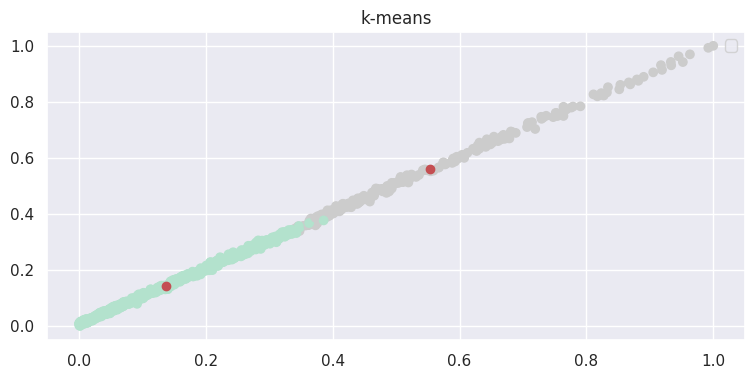

In [ ]:
pred_kmeans = kmeans.fit_predict(scal_data)
plt.scatter(scal_data[0], scal_data[1], c=pred_kmeans, cmap='Pastel2');
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro')
plt.legend(loc=0) # https://devpractice.ru/matplotlib-lesson-3-1-work-with-legend/#p1
# Место расположения легенды определяется параметром loc, которое может принимать значение 0 - the best и тд

plt.title('k-means');

In [ ]:
kmeans.cluster_centers_

array([[ 1.37213320e-01,  1.42864895e-01,  4.32391561e-01,
         4.02512637e-01,  1.00000000e+00,  4.70139373e-01,
         1.59272054e-01,  4.88306527e-01,  1.50659632e-01,
         3.35150912e-01,  4.85652798e-01,  4.99128920e-01,
         6.34225531e-01,  5.69512195e-01,  3.78919861e-01,
         5.14875369e-01,  4.64878049e-01,  1.00000000e+00],
       [ 5.53069541e-01,  5.58592147e-01,  5.00536960e-01,
         4.50150686e-01, -1.22124533e-15,  5.17903930e-01,
         5.54141604e-01,  4.87201731e-01,  5.50290003e-01,
         3.71916293e-01,  5.24659646e-01,  5.38864629e-01,
         5.93092497e-01,  5.36681223e-01,  3.42794760e-01,
         5.47094390e-01,  4.94264920e-01, -1.22124533e-15]])

In [ ]:
clusters = pd.Series(kmeans.labels_)

In [ ]:
clusters.value_counts()

0    574
1    229
dtype: int64

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

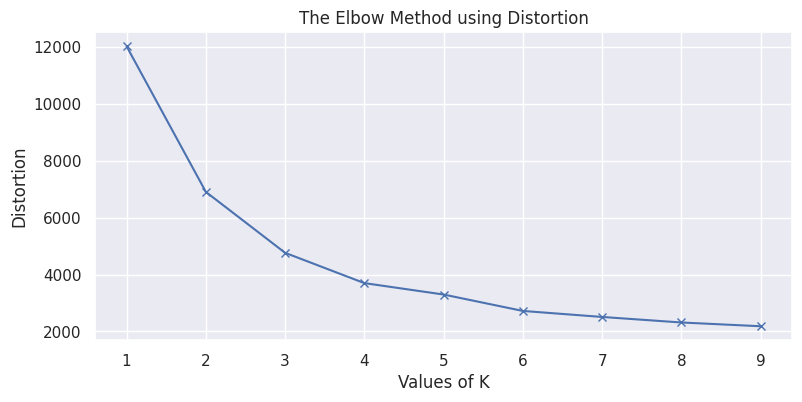

In [ ]:
#Искажение: рассчитывается как среднее квадратов расстояний от центров кластеров соответствующих кластеров. Как правило, используется евклидова метрика расстояния .
#Инерция: это сумма квадратов расстояний образцов до их ближайшего центра кластера.
#Мы перебираем значения k от 1 до 9 и вычисляем значения искажений для каждого значения k и вычисляем искажения и инерцию для каждого значения k в данном диапазоне.
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range (1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(df_kmeans)
    #kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(df_kmeans, kmeanModel.cluster_centers_, 'euclidean' ), axis = 1)) / df_kmeans.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum (np. min (cdist(df_kmeans, kmeanModel.cluster_centers_,'euclidean'), axis = 1)) /df_kmeans.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-' )
plt.xlabel( 'Values of K' )
plt.ylabel( 'Distortion' )
plt.title( 'The Elbow Method using Distortion' )
plt.show()

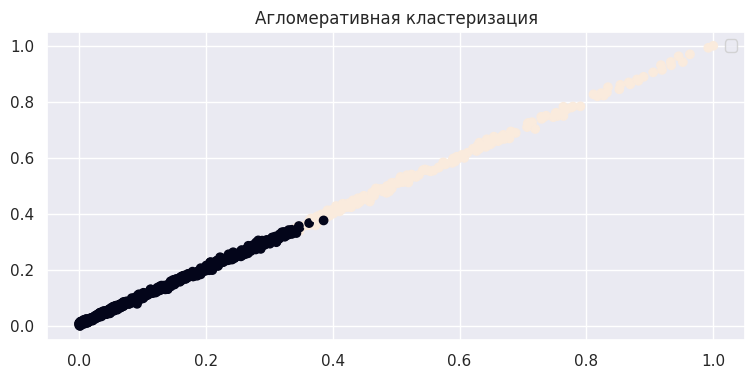

In [ ]:
aggCl = AgglomerativeClustering(n_clusters= 2, compute_distances=True)

aggCl = aggCl.fit(scal_data)
pred_agCl = aggCl.fit_predict(scal_data)
plt.scatter(scal_data[0], scal_data[1], c=pred_agCl);
#plt.plot(aggCl.cluster_centers_[:,0],aggCl.cluster_centers_[:,1],'ro')
plt.legend(loc=0)

plt.title('Агломеративная кластеризация');

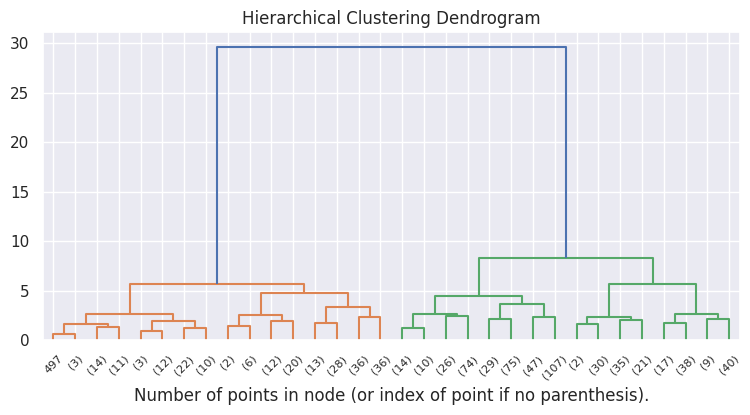

In [ ]:
'''
cм. также https://proglib.io/p/unsupervised-ml-with-python

'''


import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
#model = model.fit(scal_data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(aggCl, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scal_data, y = StandardScaler().fit_transform(df_kmeans.drop(["rating"], axis=1)), df_kmeans["rating"]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca2D = pca.fit_transform(scal_data)

In [ ]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            df_kmeans.columns)))

1 component: 36.69% of initial variance
0.355 x maps_played + 0.354 x rounds_played + 0.273 x kd_difference + 0.232 x kd_ratio + -0.334 x Cluster + 0.372 x rating + -0.073 x total_kills + 0.342 x headshot_percentage + 0.023 x total_deaths + 0.198 x grenade_damage_per_round + -0.015 x kills_per_round + -0.169 x assists_per_round + -0.125 x deaths_per_round + -0.006 x teammate_saved_per_round + 0.158 x saved_by_teammate_per_round + 0.166 x kast + -0.334 x impact
2 component: 25.08% of initial variance
0.204 x maps_played + 0.205 x rounds_played + -0.307 x kd_difference + -0.385 x kd_ratio + -0.184 x Cluster + 0.156 x rating + 0.171 x total_kills + 0.232 x headshot_percentage + 0.173 x total_deaths + -0.332 x grenade_damage_per_round + 0.244 x kills_per_round + 0.273 x assists_per_round + 0.135 x deaths_per_round + -0.207 x teammate_saved_per_round + -0.287 x saved_by_teammate_per_round + -0.285 x kast + -0.184 x impact


Text(0.5, 1.0, 'PCA')

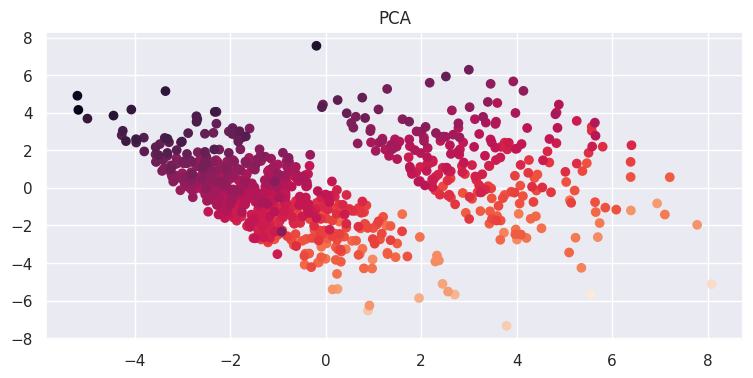

In [ ]:
plt.scatter(data_pca2D[:,0], data_pca2D[:,1], c=y);

plt.title('PCA')

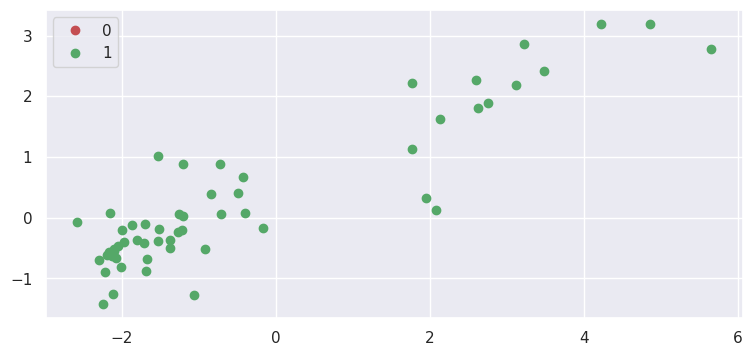

In [ ]:
plt.plot(data_pca2D[y == 0, 0], data_pca2D[y == 0, 1], 'ro', label='0')
plt.plot(data_pca2D[y == 1, 0], data_pca2D[y == 1, 1], 'go', label='1')
#plt.plot(data_pca2D[y == 2, 0], data_pca2D[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

# Lol

In [ ]:
lol = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
lol.head(2)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0


In [ ]:
lol['KDB']=lol['blueKills']/(lol['blueDeaths']+1)
lol['KDR']=lol['redKills']/(lol['redDeaths']+1)
lol_kd = lol[['KDB','KDR']]

In [ ]:
lol_kd['KDB'].nunique()

174

In [ ]:
lol_kd[lol_kd['KDB']>10]

,KDB,KDR
3145,16.0,0.0
8245,13.0,0.0


In [ ]:
lol_kd.describe()

,KDB,KDR
count,9879.000000,9879.000000
mean,1.075778,1.068207
std,0.903375,0.896460
min,0.000000,0.000000
25%,0.500000,0.531373
50%,0.857143,0.846154
75%,1.333333,1.333333
max,16.000000,15.000000


In [ ]:
agg_func_math = {
    'KDB': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'nunique', 'count', 'mad', 'prod']
}
lol_col = lol.groupby(['blueWins']).agg(agg_func_math).round(2)
lol_col

<ipython-input-54-2262def3f803>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  lol_col = lol.groupby(['blueWins']).agg(agg_func_math).round(2)
<ipython-input-54-2262def3f803>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  lol_col = lol.groupby(['blueWins']).agg(agg_func_math).round(2)


KDB                                                             
              sum  mean median  min   max   std   var nunique count   mad prod
blueWins                                                                      
0         3588.07  0.73   0.62  0.0   6.0  0.50  0.25     137  4949  0.35  0.0
1         7039.54  1.43   1.17  0.0  16.0  1.07  1.14     148  4930  0.70  0.0

In [ ]:
lol_m = lol.drop(lol[lol.blueDeaths < 0.1].index)
lol_m['KDB']=lol_m['blueKills']/(lol_m['blueDeaths'])

In [ ]:
lol_m = lol.drop(lol[lol.redDeaths < 0.1].index)
lol_m['KDR']=lol_m['redKills']/(lol_m['redDeaths'])

In [ ]:
lol_m[['KDB','KDR']].describe()

,KDB,KDR
count,9816.000000,9816.000000
mean,1.082682,1.357080
std,0.902136,1.338499
min,0.058824,0.000000
25%,0.545455,0.600000
50%,0.857143,1.000000
75%,1.333333,1.635417
max,16.000000,16.000000


In [ ]:
agg_func_math = {
    'KDB': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'nunique', 'count', 'mad', 'prod']
}
lol_m = lol.groupby(['blueWins']).agg(agg_func_math).round(2)
lol_m

<ipython-input-58-bbdfb4315cb2>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  lol_m = lol.groupby(['blueWins']).agg(agg_func_math).round(2)
<ipython-input-58-bbdfb4315cb2>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  lol_m = lol.groupby(['blueWins']).agg(agg_func_math).round(2)


KDB                                                             
              sum  mean median  min   max   std   var nunique count   mad prod
blueWins                                                                      
0         3588.07  0.73   0.62  0.0   6.0  0.50  0.25     137  4949  0.35  0.0
1         7039.54  1.43   1.17  0.0  16.0  1.07  1.14     148  4930  0.70  0.0

In [ ]:
agg_func_math = {
    'KDR': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'nunique', 'count', 'mad', 'prod']
}
lol_m = lol.groupby(['blueWins']).agg(agg_func_math).round(2)
lol_m

<ipython-input-59-b488b9a9a06a>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  lol_m = lol.groupby(['blueWins']).agg(agg_func_math).round(2)
<ipython-input-59-b488b9a9a06a>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  lol_m = lol.groupby(['blueWins']).agg(agg_func_math).round(2)


KDR                                                             
              sum  mean median  min   max   std   var nunique count   mad prod
blueWins                                                                      
0         7021.37  1.42   1.17  0.0  15.0  1.06  1.12     138  4949  0.70  0.0
1         3531.45  0.72   0.62  0.0   6.0  0.49  0.24     141  4930  0.35  0.0

# сеть

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# загрузка данных из CSV
url = 'https://raw.githubusercontent.com/vn322/Sport-University/main/hltv_playerStats-complete.csv'
data = pd.read_csv(url)
data = data[['maps_played','rounds_played', 'kd_difference', 'kd_ratio', 'rating', 'total_kills',
       'headshot_percentage', 'total_deaths', 'grenade_damage_per_round',
       'kills_per_round', 'assists_per_round', 'deaths_per_round',
       'teammate_saved_per_round', 'saved_by_teammate_per_round', 'kast',
       'impact']]
# подготовка данных
X = data.drop(['rating'], axis=1)
y = data['rating']

# разбиение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# создание модели
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='elu'))
model.add(Dense(1, activation='linear'))

# компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam')

# обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

# оценка модели на тестовых данных
score = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score)

# предсказание параметра rating на новых данных
new_data = X_test

prediction = model.predict(new_data)
print("Prediction:", prediction[0][0])

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 32819790.0000
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 22437820.0000
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 14471206.0000
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 8974716.0000
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 4908231.5000
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2242175.0000
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 784707.0625
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 187224.4688
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 53661.0781
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 77001.2578
Test loss: 77001.2578125
6/6 [==============================] - 0s 2ms/step
Prediction: 149.6287


In [94]:
y_hat=model.predict(new_data)

6/6 [==============================] - 0s 2ms/step


In [95]:
pd.DataFrame({'true':y_test, 'pred':list(y_hat)})

,true,pred
192,1.06,[149.6287]
294,1.03,[103.574936]
168,1.07,[212.76811]
521,0.99,[89.670364]
535,0.99,[264.43527]
...,...,...
362,1.02,[179.73576]
355,1.02,[856.1138]
436,1.00,[193.9673]
770,0.89,[-217.63802]


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# загрузка данных из CSV
url = 'https://raw.githubusercontent.com/vn322/Sport-University/main/hltv_playerStats-complete.csv'
data = pd.read_csv(url)

# подготовка данных
X = data.drop(['rating'], axis=1)
y = data['rating']

# преобразование типа данных в float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# разбиение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# создание модели
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

# компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam')

# обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# оценка модели на тестовых данных
score = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score)

# предсказание параметра rating на новых данных
new_data = pd.DataFrame({
    'K-D diff': [10],
    'Impact': [0.80],
    'ADR': [88.9],
    'KAST': [71.6],
    'Rating 2.0': [1.10]
})
new_data = new_data.astype(np.float32) # преобразование типа данных в float32
prediction = model.predict(new_data)
print("Prediction:", prediction[0][0])

ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# загрузка данных из CSV
url = 'https://raw.githubusercontent.com/vn322/Sport-University/main/hltv_playerStats-complete.csv'
data = pd.read_csv(url)

# подготовка данных
X = data.drop(['rating'], axis=1)
y = data['rating']

# преобразование данных в one-hot encoding
X = pd.get_dummies(X, columns=['player'])

# преобразование типа данных в float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# разбиение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# создание модели
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

# компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam')

# обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# оценка модели на тестовых данных
score = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score)

# предсказание параметра rating на новых данных
new_data = pd.DataFrame({
    'K-D diff': [10],
    'Impact': [0.80],
    'ADR': [88.9],
    'KAST': [71.6],
    'Rating 2.0': [1.10],
    'player_ZywOo': [1] # пример добавления новой колонки для игрока ZywOo
})
new_data = pd.get_dummies(new_data, columns=['player']) # преобразование данных в one-hot encoding
new_data = new_data.astype(np.float32) # преобразование типа данных в float32
prediction = model.predict(new_data)
print("Prediction:", prediction[0][0])

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Загружаем данные и преобразуем категориальные переменные в числовые
data = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/hltv_playerStats-complete.csv')

encoder = LabelEncoder()
data['teams'] = encoder.fit_transform(data['teams'])
data['opponent'] = encoder.fit_transform(data['opponent'])
data['event'] = encoder.fit_transform(data['event'])
data['map'] = encoder.fit_transform(data['map'])

# Разделяем данные на обучающую и тестовую выборки
X = data.drop('rating', axis=1).values
y = data['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))

# Компилируем модель
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучаем модель
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Оцениваем качество модели на тестовой выборке
mse = model.evaluate(X_test, y_test, verbose=0)
print("Средняя квадратичная ошибка (MSE) на тестовой выборке: {:.2f}".format(mse))

In [9]:
data['nick'].nunique()

801

In [16]:
# Разделяем данные на обучающую и тестовую выборки
X = data.drop('rating', axis=1).values
y = data['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))

# Компилируем модель
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучаем модель
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Оцениваем качество модели на тестовой выборке
mse = model.evaluate(X_test, y_test, verbose=0)
print("Средняя квадратичная ошибка (MSE) на тестовой выборке: {:.2f}".format(mse))

Средняя квадратичная ошибка (MSE) на тестовой выборке: 4678.58
